# Starbucks Capstone Challenge


# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json
%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
print (pd.__version__)

1.0.3


<h2>Exploring portfolio</h2>

In [152]:
print (portfolio.shape)
portfolio.head()

(10, 6)


,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [153]:
print ('Offer types: ',portfolio['offer_type'].unique())
print  ('Difficulty types: ', portfolio['difficulty'].unique())

Offer types:  ['bogo' 'informational' 'discount']
Difficulty types:  [10  0  5 20  7]


In [8]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


Now we'll divide channel array into individual channels

In [154]:
web = []
email = []
mobile = []
social = []


for ch in portfolio['channels']:
    if 'web' in ch:
        web.append(1)
    else: 
        web.append(0)
    if 'mobile' in ch:
        mobile.append(1)
    else: 
        mobile.append(0)
    if 'email' in ch:
        email.append(1)
    else: 
        email.append(0)
    if 'social' in ch:
        social.append(1)
    else: 
        social.append(0)

portfolio["web"] = web
portfolio["mobile"] = mobile
portfolio["email"] = email
portfolio["social"] = social

portfolio = portfolio.drop(labels = 'channels', axis = 1)

In [155]:
portfolio

,reward,difficulty,duration,offer_type,id,web,mobile,email,social
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,1,0
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,1,0


Normalizing difficulty feature:

In [156]:
portfolio['difficulty'] = portfolio['difficulty']/max(portfolio['difficulty'])

In [157]:
portfolio

,reward,difficulty,duration,offer_type,id,web,mobile,email,social
0,10,0.50,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1
1,10,0.50,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0.00,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,5,0.25,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,5,1.00,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,1,0
5,3,0.35,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,0.50,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0.00,3,informational,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1
8,5,0.25,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,0.50,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,1,0


In [158]:
#one-hot encoding
pd.get_dummies(portfolio['offer_type'])

,bogo,discount,informational
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,0,1
8,1,0,0
9,0,1,0


In [159]:
portfolio = pd.concat([portfolio, pd.get_dummies(portfolio['offer_type'])], axis = 1, sort = False)
portfolio = portfolio.drop(labels = ['offer_type'], axis = 1)

In [160]:
portfolio

,reward,difficulty,duration,id,web,mobile,email,social,bogo,discount,informational
0,10,0.50,7,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,1,0,0
1,10,0.50,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
2,0,0.00,4,3f207df678b143eea3cee63160fa8bed,1,1,1,0,0,0,1
3,5,0.25,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,1,0,0
4,5,1.00,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,1,0,0,1,0
5,3,0.35,7,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,0,1,0
6,2,0.50,10,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,0,1,0
7,0,0.00,3,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1,0,0,1
8,5,0.25,5,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,1,0,0
9,2,0.50,7,2906b810c7d4411798c6938adc9daaa5,1,1,1,0,0,1,0


<h2>Exploring profile</h2>

In [19]:
print (profile.shape)
profile.head()

(17000, 5)


,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [20]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [21]:
profile['gender'].unique()

array([None, 'F', 'M', 'O'], dtype=object)

<h3>Outlier detection</h3>

**Observation:** <br />
As we can see, there are NoneType objects in certain gender columns as well as NaN in income columns. Also the age of these records is 118 so we can safely consider these records as outliers. As they will not contribute to  meaningful analysis, we will try to clean this dataset.

In [22]:
#Counting samples with None as gender
print(sum(x is None for x in profile['gender']))
print (np.count_nonzero(np.isnan(profile['income'])))

2175
2175


In [25]:
#Dropping samples with nan for income (as income will be an important feature to determine a person's spending activity
profile = profile[~np.isnan(profile['income'])]
profile

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [26]:
#Checking for gender None
print(sum(x is None for x in profile['gender']))

0


After dropping the data points with NaN as income we see that those were the same data point with None for gender. Thus our dataset is now clean. It also makes dropping these data points reasonable as they had two missing value and we still retain 87% of out dataset.

**Normalizing Date:** Now we can divide became_member_on attribute into member_year, member_month and member_year attributes.

In [31]:
became_member_on = profile["became_member_on"].to_numpy()

In [38]:
str_bmo = str(became_member_on[1])
int(str_bmo[:4])

2017

In [40]:
def separateYYYYMMDD(arr):
    '''
    Task: to format became_member_on attribute
    Input params: arr => numpy array with date in YYYYMMDD format
    Output params: 3 arrays containing ints : year, month, day
    '''
    year = []
    month = []
    day =[]
    
    for date in arr:
        date = str(date)
        year.append(int(date[:4]))
        month.append(int(date[4:6]))
        day.append(int(date[6:]))
    return year, month, day

In [41]:
profile['member_year'], profile['member_month'], profile['member_day'] = separateYYYYMMDD(became_member_on)
profile.head()

,gender,age,id,became_member_on,income,member_year,member_month,member_day
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,2017,7,15
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,2017,5,9
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,2018,4,26
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,2018,2,9
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,2017,11,11


In [42]:
#Dropping the redundant became_member_on attribute
profile = profile.drop(labels = 'became_member_on', axis = 1)
profile.head()

,gender,age,id,income,member_year,member_month,member_day
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,15
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5,9
5,M,68,e2127556f4f64592b11af22de27a7932,70000.0,2018,4,26
8,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,2018,2,9
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,11,11


In [44]:
#Checking if nan exists within age attribute
np.count_nonzero(np.isnan(profile['age']))

0

In [47]:
#raname id to cust_id to avoid confusion in future
profile = profile.rename(columns = {'id': 'cust_id'})

In [48]:
profile

,gender,age,cust_id,income,member_year,member_month,member_day
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,15
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5,9
5,M,68,e2127556f4f64592b11af22de27a7932,70000.0,2018,4,26
8,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,2018,2,9
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,11,11
...,...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,2018,6,4
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,2018,7,13
16997,M,49,01d26f638c274aa0b965d24cefe3183f,73000.0,2017,1,26
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,2016,3,7


In [106]:
profile['gender_label'] = profile['gender'].apply(lambda x: 1 if x=='F' else(2 if x=='M' else 3))
profile.head()

,gender,age,cust_id,income,member_year,member_month,member_day,gender_label
0,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,15,1
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5,9,1
2,M,68,e2127556f4f64592b11af22de27a7932,70000.0,2018,4,26,2
3,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,2018,2,9,2
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,11,11,2


<h2>Exploring transcript </h2>

In [59]:
print (transcript.shape)
transcript.head(10)

(306534, 4)


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
5,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
6,c4863c7985cf408faee930f111475da3,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},0
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
9,31dda685af34476cad5bc968bdb01c53,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0


In [50]:
transcript['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [51]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [91]:
value = transcript['value'].to_numpy().tolist()

In [92]:
pd.DataFrame(value[1:5])

,offer id
0,0b1e1539f2cc45b7b9fa7c272da2e1d7
1,2906b810c7d4411798c6938adc9daaa5
2,fafdcd668e3743c1bb461111dcafc2a4
3,4d5c57ea9a6940dd891ad53e9dbe8da0


In [94]:
norm_values = pd.DataFrame(value)

In [95]:
norm_values.head()

,offer id,amount,offer_id,reward
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN
2,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN
3,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN
4,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN


In [107]:
#Saving normalized dataframes
profile.to_csv('normalized/profile.csv')

In [165]:
portfolio.to_csv('normalized/portfolio.csv')

In [106]:
#Replacing NaN with 0
norm_values = norm_values.fillna(0)

In [109]:
#Concatenating transcript df with norm_values

transcript = pd.concat([transcript, norm_values], axis=1, sort = False)

In [112]:
#Dropping redundant value column
transcript = transcript.drop(labels = ["value"], axis = 1)
transcript.head()

,person,event,time,offer id,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0,0.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0,0.0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.0,0,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0.0,0,0.0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,0,0.0


In [114]:
transcript["reward"].describe()

count    306534.000000
mean          0.537219
std           1.805208
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: reward, dtype: float64

In [115]:
transcript.to_csv("normalized/transcript.csv", index = False)

**Now we will Join these datasets to get relevant information through which we can visualize underlying trends** <br />
the profile dataset will join on the person attribute of transcript dataset. Similarly, the portfolio dataset will join on the offer id attribute of transcript dataset

In [124]:
transcript[transcript['event'] == "offer received"]

,person,event,time,offer id,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0,0.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0,0.0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.0,0,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0.0,0,0.0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,0,0.0
...,...,...,...,...,...,...,...
257882,d087c473b4d247ccb0abfef59ba12b0e,offer received,576,ae264e3637204a6fb9bb56bc8210ddfd,0.0,0,0.0
257883,cb23b66c56f64b109d673d5e56574529,offer received,576,2906b810c7d4411798c6938adc9daaa5,0.0,0,0.0
257884,6d5f3a774f3d4714ab0c092238f3a1d7,offer received,576,2298d6c36e964ae4a3e7e9706d1fb8c2,0.0,0,0.0
257885,9dc1421481194dcd9400aec7c9ae6366,offer received,576,ae264e3637204a6fb9bb56bc8210ddfd,0.0,0,0.0


In [142]:
#checking a single customer's record
transcript[transcript['person'] == '78afa995795e4d85b5d9ceeca43f5fef']

,person,event,time,offer id,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,0,0.0
15561,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,0,0.0
47582,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,0,19.89,0,0.0
47583,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,0,0.00,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0
49502,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,0,17.78,0,0.0
53176,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,5a8bc65990b245e5a138643cd4eb9837,0.00,0,0.0
85291,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,216,5a8bc65990b245e5a138643cd4eb9837,0.00,0,0.0
87134,78afa995795e4d85b5d9ceeca43f5fef,transaction,222,0,19.67,0,0.0
92104,78afa995795e4d85b5d9ceeca43f5fef,transaction,240,0,29.72,0,0.0
141566,78afa995795e4d85b5d9ceeca43f5fef,transaction,378,0,23.93,0,0.0


In [164]:
#Converting durating from days to hours
portfolio['duration'] = portfolio['duration']*24
portfolio

,reward,difficulty,duration,id,web,mobile,email,social,bogo,discount,informational
0,10,0.50,168,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,1,0,0
1,10,0.50,120,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
2,0,0.00,96,3f207df678b143eea3cee63160fa8bed,1,1,1,0,0,0,1
3,5,0.25,168,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,1,0,0
4,5,1.00,240,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,1,0,0,1,0
5,3,0.35,168,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,0,1,0
6,2,0.50,240,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,0,1,0
7,0,0.00,72,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1,0,0,1
8,5,0.25,120,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,1,0,0
9,2,0.50,168,2906b810c7d4411798c6938adc9daaa5,1,1,1,0,0,1,0


In [3]:
#Reading in csv files
portfolio = pd.read_csv('normalized/portfolio.csv',index = False)
profile = pd.read_csv('normalized/profile.csv',index = False)
transcript = pd.read_csv('normalized/transcript.csv', index = False)

**Removing outlier records from the transcript dataset**

In [13]:
customers_pro = profile["cust_id"].unique()

In [23]:
outliers = transcript["person"].apply(lambda x: x not in customers_pro)

In [24]:
outliers

0         False
1          True
2         False
3          True
4          True
          ...  
306529    False
306530    False
306531    False
306532    False
306533     True
Name: person, Length: 306534, dtype: bool

In [21]:
print("outliers shape:", outliers.shape)
print("transcript shape:", transcript.shape)

outliers shape: (306534,)
transcript shape: (306534, 8)


In [27]:
transcript = transcript[~outliers]
#transcript.shape

(272762, 8)

In [31]:
transcript.head()

,person,event,time,offer id,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0,0.0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.0,0,0.0
5,389bc3fa690240e798340f5a15918d5c,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0,0.0
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,3f207df678b143eea3cee63160fa8bed,0.0,0,0.0
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0,0.0


**Normalize transcript** <br />
Now label _'event'_ wit codes [1,2,3,4] and construct a clean consistent dataset with each sample containing all the event information for that particular offer.


In [53]:
#convert events into nummeric data
transcript['event_code'] = transcript['event'].apply(lambda x:1 if x == 'offer received' 
                                                     else (2 if x == 'offer viewed'
                                                            else (3 if x == 'offer completed' else 4)))

In [55]:
transcript.tail()

,person,event,time,offer id,amount,offer_id,reward,event_code
306527,24f56b5e1849462093931b164eb803b5,offer completed,714,0,0.00,fafdcd668e3743c1bb461111dcafc2a4,2.0,3
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,0,1.59,0,0.0,4
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,0,9.53,0,0.0,4
306531,a00058cf10334a308c68e7631c529907,transaction,714,0,3.61,0,0.0,4
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,0,3.53,0,0.0,4


In [65]:
#Similarly adding labels to offers
portfolio["offer_label"] = list(range(1,11))
portfolio

,reward,difficulty,duration,id,web,mobile,email,social,bogo,discount,informational,offer_label
0,10,0.50,168,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,1,0,0,1
1,10,0.50,120,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0,2
2,0,0.00,96,3f207df678b143eea3cee63160fa8bed,1,1,1,0,0,0,1,3
3,5,0.25,168,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,1,0,0,4
4,5,1.00,240,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,1,0,0,1,0,5
5,3,0.35,168,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,0,1,0,6
6,2,0.50,240,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,0,1,0,7
7,0,0.00,72,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1,0,0,1,8
8,5,0.25,120,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,1,0,0,9
9,2,0.50,168,2906b810c7d4411798c6938adc9daaa5,1,1,1,0,0,1,0,10


Now apply these labels to transcript:

In [69]:
#first we remove the redundant offer_id column which holds ids of completed transactions
# Since we already have event we dont need to retain this column. Instead well merge it with 'offer id' column

trans_completed_bool = transcript['event'] == 'offer completed'
# trans_other = 
trans_completed_df = transcript[trans_completed_bool]

In [72]:
trans_completed_df = trans_completed_df.drop(labels = 'offer id', axis=1)

In [76]:
trans_completed_df = trans_completed_df.rename(columns={"offer_id": "offer id"})

In [77]:
trans_completed_df.head()

,person,event,time,amount,offer id,reward,event_code
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,0,0.0,2906b810c7d4411798c6938adc9daaa5,2.0,3
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,0,0.0,fafdcd668e3743c1bb461111dcafc2a4,2.0,3
12679,629fc02d56414d91bca360decdfa9288,offer completed,0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,3
12692,676506bad68e4161b9bbaffeb039626b,offer completed,0,0.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,3
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,0,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,3


In [80]:
trans_completed_df.columns.values

array(['person', 'event', 'time', 'amount', 'offer id', 'reward',
       'event_code'], dtype=object)

In [81]:
trans_completed_df[['person', 'event', 'time', 'offer id','amount',  'reward','event_code']].head()

,person,event,time,offer id,amount,reward,event_code
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,0,2906b810c7d4411798c6938adc9daaa5,0.0,2.0,3
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,0,fafdcd668e3743c1bb461111dcafc2a4,0.0,2.0,3
12679,629fc02d56414d91bca360decdfa9288,offer completed,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,5.0,3
12692,676506bad68e4161b9bbaffeb039626b,offer completed,0,ae264e3637204a6fb9bb56bc8210ddfd,0.0,10.0,3
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,10.0,3


In [82]:
#get for all the other events
trans_other = transcript[~trans_completed_bool]
trans_other.head()

,person,event,time,offer id,amount,offer_id,reward,event_code
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0,0.0,1
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.0,0,0.0,1
5,389bc3fa690240e798340f5a15918d5c,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0,0.0,1
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,3f207df678b143eea3cee63160fa8bed,0.0,0,0.0,1
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0,0.0,1


In [83]:
trans_other = trans_other.drop(labels = 'offer_id', axis= 1)
trans_other.head()

,person,event,time,offer id,amount,reward,event_code
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,1
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.0,0.0,1
5,389bc3fa690240e798340f5a15918d5c,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0.0,1
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,3f207df678b143eea3cee63160fa8bed,0.0,0.0,1
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0.0,1


In [84]:
#Now as both the dataframes have same formats we can merge them 

trans_full = trans_other.append(trans_completed_df[['person', 'event', 'time', 'offer id','amount',  'reward','event_code']],sort = False)
print (trans_full.head())
print (trans_full.tail())

                             person           event  time  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received     0   
2  e2127556f4f64592b11af22de27a7932  offer received     0   
5  389bc3fa690240e798340f5a15918d5c  offer received     0   
7  2eeac8d8feae4a8cad5a6af0499a211d  offer received     0   
8  aa4862eba776480b8bb9c68455b8c2e1  offer received     0   

                           offer id  amount  reward  event_code  
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     0.0     0.0           1  
2  2906b810c7d4411798c6938adc9daaa5     0.0     0.0           1  
5  f19421c1d4aa40978ebb69ca19b0e20d     0.0     0.0           1  
7  3f207df678b143eea3cee63160fa8bed     0.0     0.0           1  
8  0b1e1539f2cc45b7b9fa7c272da2e1d7     0.0     0.0           1  
                                  person            event  time  \
306456  f3e801caeafe4899b3b989b586e74ac7  offer completed   714   
306470  452cdae2c68e4732a4177d3929562690  offer completed   714   
306475  0c027f5f34dd4b9eba0a25785c61

In [85]:
trans_full.shape

(272762, 7)

In [86]:
portfolio.head()

,reward,difficulty,duration,id,web,mobile,email,social,bogo,discount,informational,offer_label
0,10,0.50,168,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,1,0,0,1
1,10,0.50,120,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0,2
2,0,0.00,96,3f207df678b143eea3cee63160fa8bed,1,1,1,0,0,0,1,3
3,5,0.25,168,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,1,0,0,4
4,5,1.00,240,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,1,0,0,1,0,5


In [88]:
portfolio = portfolio.rename(columns = {"id": "offer id"})

In [89]:
portfolio.head()

,reward,difficulty,duration,offer id,web,mobile,email,social,bogo,discount,informational,offer_label
0,10,0.50,168,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,1,0,0,1
1,10,0.50,120,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0,2
2,0,0.00,96,3f207df678b143eea3cee63160fa8bed,1,1,1,0,0,0,1,3
3,5,0.25,168,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,1,0,0,4
4,5,1.00,240,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,1,0,0,1,0,5


In [93]:
complete_transcript_df = pd.merge(trans_full,portfolio[['offer id', 'offer_label']], on='offer id', how = 'left')
#complete_transcript_df.shape
complete_transcript_df.head()

,person,event,time,offer id,amount,reward,event_code,offer_label
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,1,4.0
1,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.0,0.0,1,10.0
2,389bc3fa690240e798340f5a15918d5c,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0.0,1,9.0
3,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,3f207df678b143eea3cee63160fa8bed,0.0,0.0,1,3.0
4,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0.0,1,5.0


In [94]:
complete_transcript_df.tail()

,person,event,time,offer id,amount,reward,event_code,offer_label
272757,f3e801caeafe4899b3b989b586e74ac7,offer completed,714,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,5.0,3,5.0
272758,452cdae2c68e4732a4177d3929562690,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4,0.0,2.0,3,7.0
272759,0c027f5f34dd4b9eba0a25785c611273,offer completed,714,2298d6c36e964ae4a3e7e9706d1fb8c2,0.0,3.0,3,6.0
272760,8431c16f8e1d440880db371a68f82dd0,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4,0.0,2.0,3,7.0
272761,24f56b5e1849462093931b164eb803b5,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4,0.0,2.0,3,7.0


In [97]:
print (complete_transcript_df.shape)
complete_transcript_df[complete_transcript_df['event']== 'transaction'].head()

(272762, 8)


,person,event,time,offer id,amount,reward,event_code,offer_label
11027,02c083884c7d45b39cc68e1314fec56c,transaction,0,0,0.83,0.0,4,NaN
11030,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,0,34.56,0.0,4,NaN
11031,54890f68699049c2a04d415abc25e717,transaction,0,0,13.23,0.0,4,NaN
11039,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,0,19.51,0.0,4,NaN
11040,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,0,18.97,0.0,4,NaN


In [102]:
#Convert all the NaN values to 0 labels
complete_transcript_df = complete_transcript_df.fillna(0)
complete_transcript_df[complete_transcript_df['event']== 'transaction'].head()

,person,event,time,offer id,amount,reward,event_code,offer_label
11027,02c083884c7d45b39cc68e1314fec56c,transaction,0,0,0.83,0.0,4,0.0
11030,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,0,34.56,0.0,4,0.0
11031,54890f68699049c2a04d415abc25e717,transaction,0,0,13.23,0.0,4,0.0
11039,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,0,19.51,0.0,4,0.0
11040,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,0,18.97,0.0,4,0.0


In [103]:
#Saving normalize transcript file
complete_transcript_df.to_csv('normalized/complete_transcript_df.csv')

<h2>Exploratory Data Analysis and Insights:</h2>

Now we will observe the trends these cleaned datasets provide before mergining them into one master file.

<h3>Profile</h3> 

**Analysing distribution of income:**

Text(0, 0.5, 'Count')

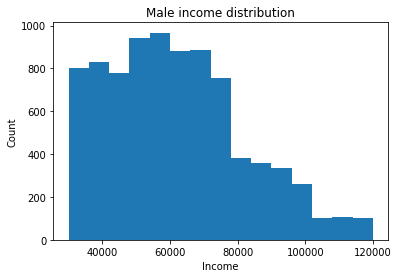

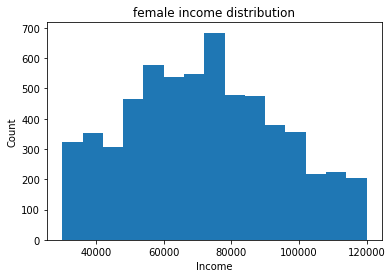

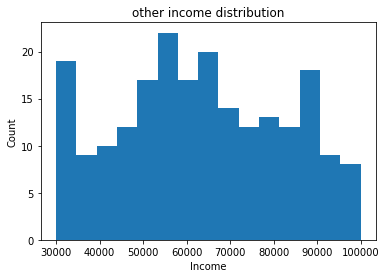

In [125]:
# male_income = profile[profile['gender'] =='M']['income'].tolist()
# female_income = profile[profile['gender'] =='F']['income'].tolist()
# other_income =  profile[profile['gender'] =='O']['income'].tolist()

#profile['income'].describe()   Min income is:30,000; Max income is: 120,000
#Male
male_income = profile[profile['gender'] =='M']['income'].plot(kind= 'hist', bins= 15, title = "Male income distribution")
male_income.set_xlabel("Income")
male_income.set_ylabel("Count")

#Female
plt.figure()
female_income = profile[profile['gender'] =='F']['income'].plot(kind= 'hist', bins= 15, title = "female income distribution")
female_income.set_xlabel("Income")
female_income.set_ylabel("Count")

#Other
plt.figure()
other_income = profile[profile['gender'] =='O']['income'].plot(kind= 'hist', bins= 15, title = "other income distribution")
other_income.set_xlabel("Income")
other_income.set_ylabel("Count")

**Analysing age distribution:**

Text(0, 0.5, 'Count')

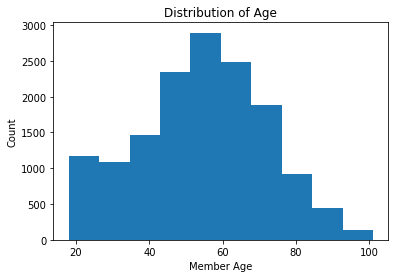

In [122]:
#plots age distribution
#profile['age'].describe()
member_age = profile['age'].plot(kind = 'hist', bins = 10, title= "Distribution of Age")
member_age.set_xlabel("Member Age")
member_age.set_ylabel("Count")

**Distribution of memberships over years:**

In [130]:
width = 0.3
years = profile['member_year'].unique()
years.sort()

In [144]:
#Male count by year
count_M = []
count_F = []
count_O = []
for yr in years:
    count_M.append(profile[profile['gender'] =='M'][profile['member_year'] == yr].shape[0])
    count_F.append(profile[profile['gender'] =='F'][profile['member_year'] == yr].shape[0])
    count_O.append(profile[profile['gender'] =='O'][profile['member_year'] == yr].shape[0])

print (count_M)
print (count_F)
print (count_O)

[197, 520, 905, 1483, 3067, 2312]
[74, 138, 663, 1509, 2443, 1302]
[3, 4, 29, 32, 89, 55]


/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Text(0, 0.5, 'New member count')

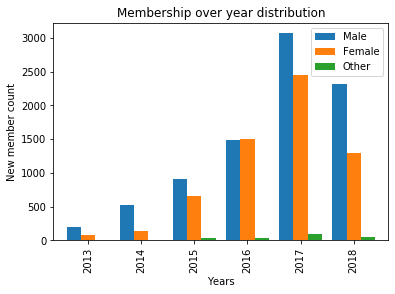

In [150]:
#Bar graph of membership over the years
plot_data = pd.DataFrame({
    "Male": count_M,
    "Female": count_F,
    "Other": count_O
},
index= years)

plot_data.plot(kind="bar",width= 0.8)
plt.title("Membership over year distribution")
plt.xlabel("Years")
plt.ylabel("New member count")

<h3>Transcript</h3>

Distribution of viewed offer vs completed offer

In [152]:
complete_transcript_df.head()

,person,event,time,offer id,amount,reward,event_code,offer_label
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,1,4.0
1,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.0,0.0,1,10.0
2,389bc3fa690240e798340f5a15918d5c,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0.0,1,9.0
3,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,3f207df678b143eea3cee63160fa8bed,0.0,0.0,1,3.0
4,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0.0,1,5.0


In [162]:
complete_transcript_df[complete_transcript_df['event_code'] == 3][complete_transcript_df['offer_label'] == 2]

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,person,event,time,offer id,amount,reward,event_code,offer_label
240322,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,10.0,3,2.0
240323,227f2d69e46a4899b70d48182822cff6,offer completed,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,10.0,3,2.0
240327,3e621194f72e40d7a0b695ee9b7c38b7,offer completed,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,10.0,3,2.0
240338,5d048a36203c483facb5ed09983ab388,offer completed,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,10.0,3,2.0
240359,a9a088afe7f54587bb28b723d403f476,offer completed,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,10.0,3,2.0
...,...,...,...,...,...,...,...,...
272384,668540a7741a465ba9e1b763c30a369d,offer completed,696,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,10.0,3,2.0
272385,c1f7880040884f6dadc4c6a659a075a5,offer completed,696,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,10.0,3,2.0
272388,f8d4fae1b4384aa98094a5dc625eaa43,offer completed,696,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,10.0,3,2.0
272395,dc736654f1fb4c499f907880699d1233,offer completed,696,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,10.0,3,2.0


In [163]:
count_rec_labels = []
count_view_labels = []
count_comp_labels = []
for i in range(1,11):
    count_rec_labels.append(complete_transcript_df[complete_transcript_df['event_code'] == 1][complete_transcript_df['offer_label'] == i].shape[0])
    count_view_labels.append(complete_transcript_df[complete_transcript_df['event_code'] == 2][complete_transcript_df['offer_label'] == i].shape[0])
    count_comp_labels.append(complete_transcript_df[complete_transcript_df['event_code'] == 3][complete_transcript_df['offer_label'] == i].shape[0])

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [165]:
# #to check if values are filled uncomment the lines below
# print(count_rec_labels)
# print(count_view_labels)
# print(count_comp_labels)

Text(0, 0.5, 'count')

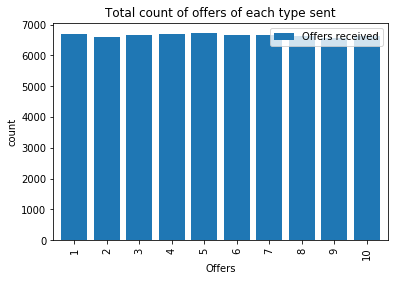

In [167]:
offer_rec_data = pd.DataFrame({
    'Offers received': count_rec_labels
},
index= range(1,11))

offer_rec_data.plot(kind="bar",width= 0.8)
plt.title("Total count of offers of each type sent")
plt.xlabel("Offers")
plt.ylabel("count")

**Insights:** <br />
We can see that each offer was distributed to almost equal amount of times.  

Text(0, 0.5, 'Count')

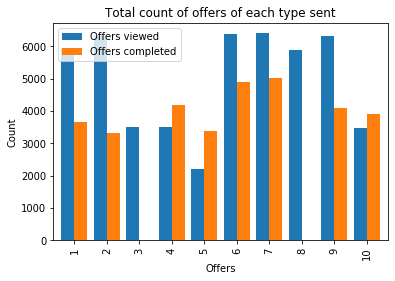

In [168]:
offer_rec_data = pd.DataFrame({
    'Offers viewed': count_view_labels,
    'Offers completed': count_comp_labels
},
index= range(1,11))

offer_rec_data.plot(kind="bar",width= 0.8)
plt.title("Total count of offers of each type sent")
plt.xlabel("Offers")
plt.ylabel("Count")

**Insights** <br />
_From the bar plot above we can infer the following:_
- Offers 3 and 8 are not influencing any customers to make a purchase.
- Offers 4, 5 and 10 have more completions than views for the offers. This implies that the usual customer spending have led to completion in these cases
- The remaining offers have a natural trend where the completed offers are lesser in comparison to the views

<h2>Creating a Combined DataFrame</h2>

Combining the relevant features that will help train models to predict if an offer will receive a response. Including demographic attributes should facilitate in training the model. As a target for prediction, I will create an attribute 'successful' which will be 1 if an offer was viewed and completed, else 0.

In [169]:
profile.head()

,gender,age,cust_id,income,member_year,member_month,member_day,gender_label
0,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,15,1
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,5,9,1
2,M,68,e2127556f4f64592b11af22de27a7932,70000.0,2018,4,26,2
3,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,2018,2,9,2
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,11,11,2


In [170]:
portfolio.head()

,reward,difficulty,duration,offer id,web,mobile,email,social,bogo,discount,informational,offer_label
0,10,0.50,168,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,1,0,0,1
1,10,0.50,120,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0,2
2,0,0.00,96,3f207df678b143eea3cee63160fa8bed,1,1,1,0,0,0,1,3
3,5,0.25,168,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,1,0,0,4
4,5,1.00,240,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,1,0,0,1,0,5


In [172]:
complete_transcript_df.head()

,person,event,time,offer id,amount,reward,event_code,offer_label
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,1,4.0
1,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.0,0.0,1,10.0
2,389bc3fa690240e798340f5a15918d5c,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0.0,1,9.0
3,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,3f207df678b143eea3cee63160fa8bed,0.0,0.0,1,3.0
4,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0.0,1,5.0


In [219]:
profile.to_csv('normalized/profile.csv')

In [28]:
# profile = pd.read_csv('normalized/profile.csv', index_col = False)
# portfolio =  pd.read_csv('normalized/portfolio.csv', index_col = False)
complete_trans = pd.read_csv('normalized/complete_transcript_df.csv', index_col = False)


In [29]:
# profile = profile.drop(labels="Unnamed: 0", axis = 1)
# portfolio = portfolio.drop(labels="Unnamed: 0", axis = 1)
# complete_trans = complete_trans.drop(labels="Unnamed: 0", axis = 1)

In [4]:
portfolio.head()

,reward,difficulty,duration,id,web,mobile,email,social,bogo,discount,informational,offer_label
0,10,0.50,168,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,1,0,0,1
1,10,0.50,120,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0,2
2,0,0.00,96,3f207df678b143eea3cee63160fa8bed,1,1,1,0,0,0,1,3
3,5,0.25,168,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,1,0,0,4
4,5,1.00,240,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,1,0,0,1,0,5


**For a combined dataFrame:** <br />
- Extract each event of every unique customer.
- Calculate the amount spent after viewing offer.
- Form a final DataFrame with total_amount and successful columns appended

In [30]:
complete_trans_clean = complete_trans.drop(labels = ['event','offer id'],axis =1)
transaction_df = complete_trans_clean[(complete_trans_clean['event_code']==4)]
complete_trans_clean = complete_trans_clean[(complete_trans_clean['event_code']==2)|
                                            (complete_trans_clean['event_code']==3)|
                                            (complete_trans_clean['event_code']==1)]

complete_trans_clean

,person,time,amount,reward,event_code,offer_label
0,78afa995795e4d85b5d9ceeca43f5fef,0,0.0,0.0,1,4.0
1,e2127556f4f64592b11af22de27a7932,0,0.0,0.0,1,10.0
2,389bc3fa690240e798340f5a15918d5c,0,0.0,0.0,1,9.0
3,2eeac8d8feae4a8cad5a6af0499a211d,0,0.0,0.0,1,3.0
4,aa4862eba776480b8bb9c68455b8c2e1,0,0.0,0.0,1,5.0
...,...,...,...,...,...,...
272757,f3e801caeafe4899b3b989b586e74ac7,714,0.0,5.0,3,5.0
272758,452cdae2c68e4732a4177d3929562690,714,0.0,2.0,3,7.0
272759,0c027f5f34dd4b9eba0a25785c611273,714,0.0,3.0,3,6.0
272760,8431c16f8e1d440880db371a68f82dd0,714,0.0,2.0,3,7.0


In [31]:
def generate_successful_attr(offer_df, portfolio,transaction_df):
    '''
    Task: Feaure Engineering - Create 'successful' and 'total_amount' attributes from information provided by 
                               the input datasets and return a new dataframe containing these attributes along with other 
                               relevant attributes.
    Inputs: DataFrames - offer_df: The cleaned transcript dataset that doesn't contain transaction events. 
                                   Only offer events.
                       
                         portfolio: Relevant attributes within portfolio DataFrame
                       
                         transaction_df : cleaned transcript with only transaction events
    
    returns: DataFrame with successful and total_amount attributes created.
    '''
    
    data = []
    customers = offer_df['person'].unique()
    
    
    #iterating through all customers
    for ind in range(len(customers)):
        
        rows=[]
        cust_id = customers[ind]
        
        #Get offer data of the customer
        cust_offers = offer_df[offer_df['person']== cust_id]
        #Also get transaction data
        cust_transactions = transaction_df[transaction_df['person'] == cust_id]
        
        #Divide offer data by offer event
        offers_received = cust_offers[cust_offers['event_code'] == 1]
        offers_viewed = cust_offers[cust_offers['event_code'] == 2]
        offers_completed = cust_offers[cust_offers['event_code'] == 3]
        
        #for each offer received
        for i in range(offers_received.shape[0]):
            
            offer_label = offers_received.iloc[i]['offer_label']
            
            duration = portfolio[portfolio['offer_label'] == offer_label]['duration'].values[0]
            
            # Establish start and end time for offers
            offer_start = offers_received.iloc[i]['time']
            offer_end = offer_start + duration
            
            #Get viewed offers within valid duration
            offers_viewed_intime = np.logical_and(offers_viewed['time'] >=offer_start,
                                                  offers_viewed['time'] <= offer_end)
            
            #Get completed offers within valid duration
            offers_comp_intime = np.logical_and(offers_completed['time'] >=offer_start, 
                                               offers_completed['time'] <= offer_end)
            
            #if successful (viewed and completed) then 1 else 0
            offers_successful = offers_comp_intime.sum() > 0 and  offers_viewed_intime.sum() > 0
            
            #Get transactions between duration
            transaction_intime = np.logical_and(cust_transactions['time'] >= offer_start,
                                               cust_transactions['time'] <= offer_end)
            
            transactions = cust_transactions[transaction_intime]
            #Sum of all transactions within offer duration
            transaction_sum = transactions['amount'].sum()
            
            row = {'offer_label': offer_label,'person':cust_id,
                  'time': offer_start, 'total_amount': transaction_sum,
                  'successful':int(offers_successful)}
            
            rows.append(row)
        data.extend(rows)
    output_df = pd.DataFrame(data)
    return output_df    

In [67]:
#viewing transaction activity of a single customer
complete_trans_clean[complete_trans_clean['person']=='389bc3fa690240e798340f5a15918d5c']

,person,time,amount,reward,event_code,offer_label
11023,389bc3fa690240e798340f5a15918d5c,0,0.00,0.0,2,9.0
26370,389bc3fa690240e798340f5a15918d5c,60,9.54,0.0,4,0.0
62563,389bc3fa690240e798340f5a15918d5c,192,0.00,0.0,2,4.0
106910,389bc3fa690240e798340f5a15918d5c,354,0.00,0.0,2,10.0
143537,389bc3fa690240e798340f5a15918d5c,438,0.00,0.0,2,4.0
158371,389bc3fa690240e798340f5a15918d5c,498,15.63,0.0,4,0.0
170555,389bc3fa690240e798340f5a15918d5c,504,0.00,0.0,2,9.0
209771,389bc3fa690240e798340f5a15918d5c,588,0.00,0.0,2,7.0
214147,389bc3fa690240e798340f5a15918d5c,600,11.26,0.0,4,0.0
242780,389bc3fa690240e798340f5a15918d5c,60,0.00,5.0,3,9.0


In [32]:
#Get new dataFrame with successful and total_amount attributes
df_successful = generate_successful_attr(complete_trans_clean,portfolio[['offer_label','duration']],transaction_df)
df_successful.head()

,offer_label,person,time,total_amount,successful
0,4.0,78afa995795e4d85b5d9ceeca43f5fef,0,37.67,1
1,8.0,78afa995795e4d85b5d9ceeca43f5fef,168,49.39,0
2,1.0,78afa995795e4d85b5d9ceeca43f5fef,408,48.28,1
3,9.0,78afa995795e4d85b5d9ceeca43f5fef,504,48.28,1
4,10.0,e2127556f4f64592b11af22de27a7932,0,0.00,0


Merge the demographic (profile) and portfolio datasets to the _successful_df_ to form a final combined_df for training ML models

In [41]:
#merging offer info
portfolio_merged = pd.merge(df_successful ,portfolio[[ 'offer_label','duration','difficulty', 'web', 'mobile','email', 'social', 'bogo', 'discount', 'informational']],
                            on='offer_label', how = 'left')

In [46]:
#Renaming column to merge on column name
#Merging Demographic info
# profile = profile.rename(columns ={'cust_id':'person'})
combined_df = pd.merge(portfolio_merged, profile[['person','age','income','member_year','gender_label']],
                      on='person', how='left')
combined_df.head()

,offer_label,person,time,total_amount,successful,duration,difficulty,web,mobile,email,social,bogo,discount,informational,age,income,member_year,gender_label
0,4.0,78afa995795e4d85b5d9ceeca43f5fef,0,37.67,1,168,0.25,1,1,1,0,1,0,0,75,100000.0,2017,1
1,8.0,78afa995795e4d85b5d9ceeca43f5fef,168,49.39,0,72,0.00,0,1,1,1,0,0,1,75,100000.0,2017,1
2,1.0,78afa995795e4d85b5d9ceeca43f5fef,408,48.28,1,168,0.50,0,1,1,1,1,0,0,75,100000.0,2017,1
3,9.0,78afa995795e4d85b5d9ceeca43f5fef,504,48.28,1,120,0.25,1,1,1,1,1,0,0,75,100000.0,2017,1
4,10.0,e2127556f4f64592b11af22de27a7932,0,0.00,0,168,0.50,1,1,1,0,0,1,0,68,70000.0,2018,2


In [48]:
combined_df.shape

(66501, 18)

In [50]:
#Saving combined_df to be used for Modeling
combined_df.to_csv('normalized/combined_df.csv', index=False)

The final dataframe with all the relevant features is created as *'combined_df'*

<h2>Exploring Combined Dataframe</h2>

Checking the success count of each offer type

In [40]:
#Gathering counts for plots
count_success = []
count_fails = []
count_totals = []
for label in range(1,11):
    count_success.append(combined_df[(combined_df['offer_label']==label) & (combined_df['successful']==1)].shape[0])
    count_fails.append(combined_df[(combined_df['offer_label']==label) & (combined_df['successful']==0)].shape[0])
    count_totals = np.array(count_success) + np.array(count_fails)

In [41]:
count_totals

array([6683, 6593, 6657, 6685, 6726, 6655, 6652, 6643, 6576, 6631])

Text(0, 0.5, 'Offers')

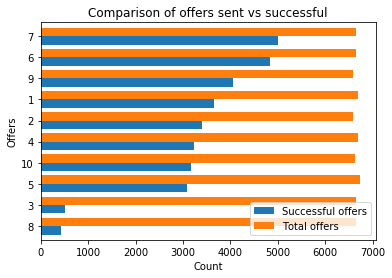

In [42]:
#Sorting data by success rate
df_temp = pd.DataFrame({'success':count_success, 'total': count_totals, 'label': range(1,11)})
df_temp = df_temp.sort_values(by = 'success')
count_success = np.array(df_temp['success'])
count_totals = np.array(df_temp['total'])
labels = np.array(df_temp['label'])

#plotting offer conversion comparison
offer_rec_data = pd.DataFrame({
    'Successful offers': count_success,
    'Total offers': count_totals
},
index= labels)

offer_rec_data.plot(kind="barh",width= 0.8)
plt.title("Comparison of offers sent vs successful")
plt.xlabel("Count")
plt.ylabel("Offers")

In [65]:
portfolio

,reward,difficulty,duration,id,web,mobile,email,social,bogo,discount,informational,offer_label
0,10,0.50,168,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,1,0,0,1
1,10,0.50,120,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0,2
2,0,0.00,96,3f207df678b143eea3cee63160fa8bed,1,1,1,0,0,0,1,3
3,5,0.25,168,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,1,0,0,4
4,5,1.00,240,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,1,0,0,1,0,5
5,3,0.35,168,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,0,1,0,6
6,2,0.50,240,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,0,1,0,7
7,0,0.00,72,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1,0,0,1,8
8,5,0.25,120,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,1,0,0,9
9,2,0.50,168,2906b810c7d4411798c6938adc9daaa5,1,1,1,0,0,1,0,10


**Insights:**<br />
- The data displays that offers 3 and  4 and performing poorly. These are **_informational_** type of offers as we can see from portfoli dataset above.<br />
- The offers 6 and 7 are the best performing ones and they are the **_discount_** offers. Interestingly, offers 5 and 10 are also **_discount_** offers but are not performing quite as well. This could be attributed to their channels of distribution and the demography of customers to whom these offers were distributed. Another reason for offer 5 not performing as well as offers 6 and 7 could be the higher difficulty of the offer.<br />
- Offer 9 is the best performing **_BOGO_** offer among all **_BOGO_** offers. Again, from the portfolio dataset we can infer that as it was distributed over all available channels it performed better than the other two **_BOGO_** offers<br />

In [45]:
# combined_df = pd.read_csv('normalized/combined_df.csv')
# profile = pd.read_csv('normalized/profile.csv')
# profile = profile.drop(labels = ['Unnamed: 0'], axis = 1)

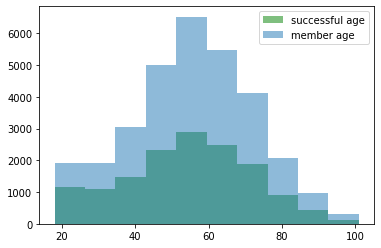

In [35]:
member_success = combined_df[combined_df['successful']==1]['age']
member_age = profile['age']
plt.hist(member_age, bins = 10, alpha = 0.5, label = 'successful age', color = 'green')
plt.hist(member_success, bins = 10, alpha = 0.5, label = 'member age')
plt.legend(loc = 'best')
plt.show()

In [43]:
total_amount = []
for label in range(1,11):
    total_amount.append(combined_df[(combined_df['offer_label']==label)]['total_amount'].sum())

Text(0, 0.5, 'Offers')

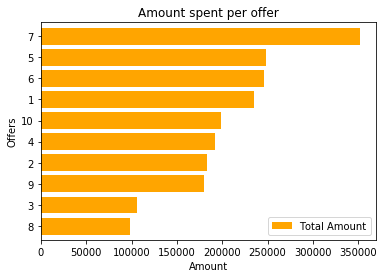

In [44]:
df_temp = pd.DataFrame({'total_amount': total_amount, 'label': range(1,11)})
df_temp = df_temp.sort_values(by = 'total_amount')
total_amount = np.array(df_temp['total_amount'])
labels = np.array(df_temp['label'])

#plotting offer conversion comparison
offer_rec_data = pd.DataFrame({
    'Total Amount': total_amount
},
index= labels)

offer_rec_data.plot(kind="barh",width= 0.8, color = 'orange')
plt.title("Amount spent per offer")
plt.xlabel("Amount")
plt.ylabel("Offers")

**Insights** <br />
- The Offer 7 is most impactful as it has the highest success rate and most amount spent.
- Although Offer 6 has been successful more number of times in comparison to Offer 5, Offer 5 has more amount spent on it. This is interesting because in terms of conversion rate, Offer 5 has performance in the bottom 3 but total business attracted by it is still the 2nd best.
- There are no interesting insights with the success rate over ae distribution. The success rate is evenly distributed with the ages of the customer base.